In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [2]:
df1 = DataFrame({'A':[1,np.nan,np.nan,np.nan],
                'B':[2,5,8,np.nan],
                'C':[3,6,np.nan,np.nan]})

In [3]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


In [7]:
df1.isnull().sum()

A    3
B    1
C    2
dtype: int64

In [8]:
# all the rows having atleast one null value gets dropped
df1.dropna()

,A,B,C
0,1.0,2.0,3.0


In [10]:
df1.dropna(how='all')

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN


In [11]:
df1.dropna(how='any')

,A,B,C
0,1.0,2.0,3.0


In [14]:
# it should have atleast 2 not null values
df1.dropna(thresh=2)

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0


In [16]:
# subset to drop from a particular column
df1.dropna(subset=['B','A'])

,A,B,C
0,1.0,2.0,3.0


In [17]:
df1.fillna(0)

,A,B,C
0,1.0,2.0,3.0
1,0.0,5.0,6.0
2,0.0,8.0,0.0
3,0.0,0.0,0.0


In [21]:
df1.fillna(method='ffill')

,A,B,C
0,1.0,2.0,3.0
1,1.0,5.0,6.0
2,1.0,8.0,6.0
3,1.0,8.0,6.0


In [22]:
df1['B'] = df1['B'].fillna(df1['B'].mean())

In [23]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,5.0,NaN


In [3]:
df = sns.load_dataset('tips')

In [6]:
q1 = df['total_bill'].quantile(0.25)
q2 = df['total_bill'].quantile(0.50)
q3 = df['total_bill'].quantile(0.75)
IQR = q3 - q1
LL = q1 - 1.5*IQR
UL = q3 + 1.5*IQR

In [7]:
print(LL,UL)

-2.8224999999999945 40.29749999999999


In [15]:
df[(df['total_bill']<LL )].shape

(0, 7)

In [16]:
df[(df['total_bill']>UL )].shape[0]

9

In [17]:
df2 = df[(df['total_bill']<UL )]

In [18]:
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


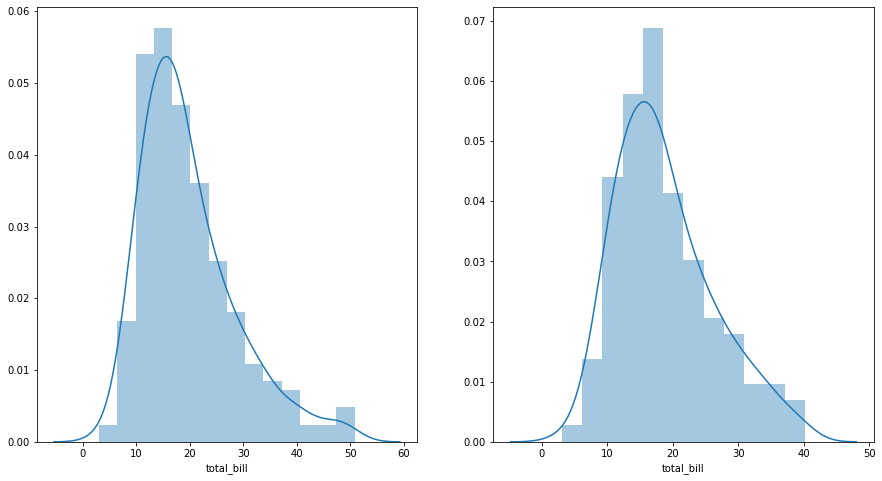

In [25]:
fig,axes = plt.subplots(1,2,figsize = (15,8))
sns.distplot(df['total_bill'],ax = axes[0])
sns.distplot(df2['total_bill'],ax = axes[1])